In [ ]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24
%cd DS4B_Sp24/Homeworks/

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 691, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 691 (delta 41), reused 92 (delta 41), pack-reused 598
Receiving objects: 100% (691/691), 105.91 MiB | 15.34 MiB/s, done.
Resolving deltas: 100% (304/304), done.
Updating files: 100% (116/116), done.
/content/DS4B_Sp24/Homeworks


# REMEMBER TO SAVE THIS NOTEBOOK TO YOUR OWN GOOGLE DRIVE!

##Please submit homework to Brightspace in the form of a file named **`lastname_firstname.ipynb`** AND as a pdf in the form of **`lastname_firstname.pdf`**


# Homework 1: Graduate admissions case study

You've been hired by Hudson University as a data analyst for the Graduate Admissions Department. Since the admission process is long and tedious, it often results in a bottleneck for other subsequent tasks, such as planning the necessary resources to accommodate the admitted students (e.g. housing, classes, etc). You have been asked to build a model to predict which students will be admitted using the following historical data:

1. Serial No. (serves as unique identifier)
2. GRE Scores (out of 340)
3. TOEFL Scores (out of 120)
4. University Rating (out of 5).
5. Statement of Purpose Strength (out of 5)
6. Letter of Recommendation Strength (out of 5)
7. Undergraduate GPA (out of 10)
8. Research Experience (either 0 or 1)
9. Chance of Admit (ranging from 0 to 1)

The chances of admit for the applicants in your data were assessed by an expert. Given that this list of application attributes would be available early in the admission process for future applications (except for Chance of Admit), a model predicting chances of admit would allow planning tasks to start earlier.

For the following numbered items, **follow any directions and answer any questions**.  Optional parts carry no credit, but should be helpful for your learning.

In [ ]:
# Some libraries you may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trick to display plots inline with the rest of your notebook.
%matplotlib inline

**1. Load the homework data into a pandas data frame. Print the number of rows and columns in the dataset.**




In [ ]:
data_path = "./data/data-hw1.csv"
df = pd.read_csv(data_path)
print("The number of (rows,columns) are:")
print(df.shape)

The number of (rows,columns) are:
(500, 9)


**2. Rename the columns in the dataframe to manipulate the data more easily. This will make your life easier. Show a few lines with the new column names.**

In [ ]:
# Put your answer here.

# Here are some suggested column names: "ID", "GRE", "TOEFL", "Rating", "SOP", "LOR", "CGPA", "Research", "Admit"
df=df.rename(columns={"Serial No.": "ID", "GRE Score": "GRE","TOEFL Score":"TOEFL","University Rating":"Rating","Chance of Admit":"Admit"})
df.head()

,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**3. Show descriptive statistics for all columns.**

In [ ]:
#YOUR CODE HERE
df.describe(include='all')

,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**4. What is the distribution of the chances of admit? Plot a histogram of
this variable. Using arguments for plt.hist, play with the variables 'color', 'alpha', and 'edgecolor' to create a histogram with blue bars, and black outlines around the bars.  Draw a red vertical dashed line on the histogram at the median value.**

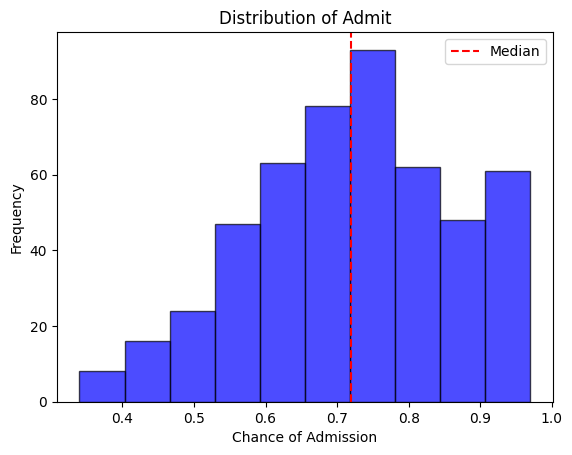

In [ ]:
chances_of_admit_data = df['Admit']

# Plot histogram
plt.hist(chances_of_admit_data, bins=10, color='blue', alpha=0.7, edgecolor='black')

# Draw a red vertical dashed line at the median
median_value = np.median(chances_of_admit_data)
plt.axvline(x=median_value, color='red', linestyle='--', label='Median')

# Set plot labels and title
plt.xlabel('Chance of Admission')
plt.ylabel('Frequency')
plt.title('Distribution of Admit')

# Display legend
plt.legend()

# Show the plot
plt.show()

**5. Chances of admit seem to vary quite a bit. How much of this depends on research experience? Print the average chance of admit against research. (this can be done using a groupby) and interpret the results.**

In [ ]:
#YOUR CODE HERE
df.groupby('Research').mean()['Admit'].round(3)

Research
0    0.635
1    0.790
Name: Admit, dtype: float64

**6. Does the distribution of chances of admit change with university rating? Plot a histogram of chances of admit for each university rating. Plot 5 histograms - with vertical line at the median for each histogram. Interpret what you learn from the plots. (optional - plot all histograms with the same range on the X-axis to aid in comparisons)**

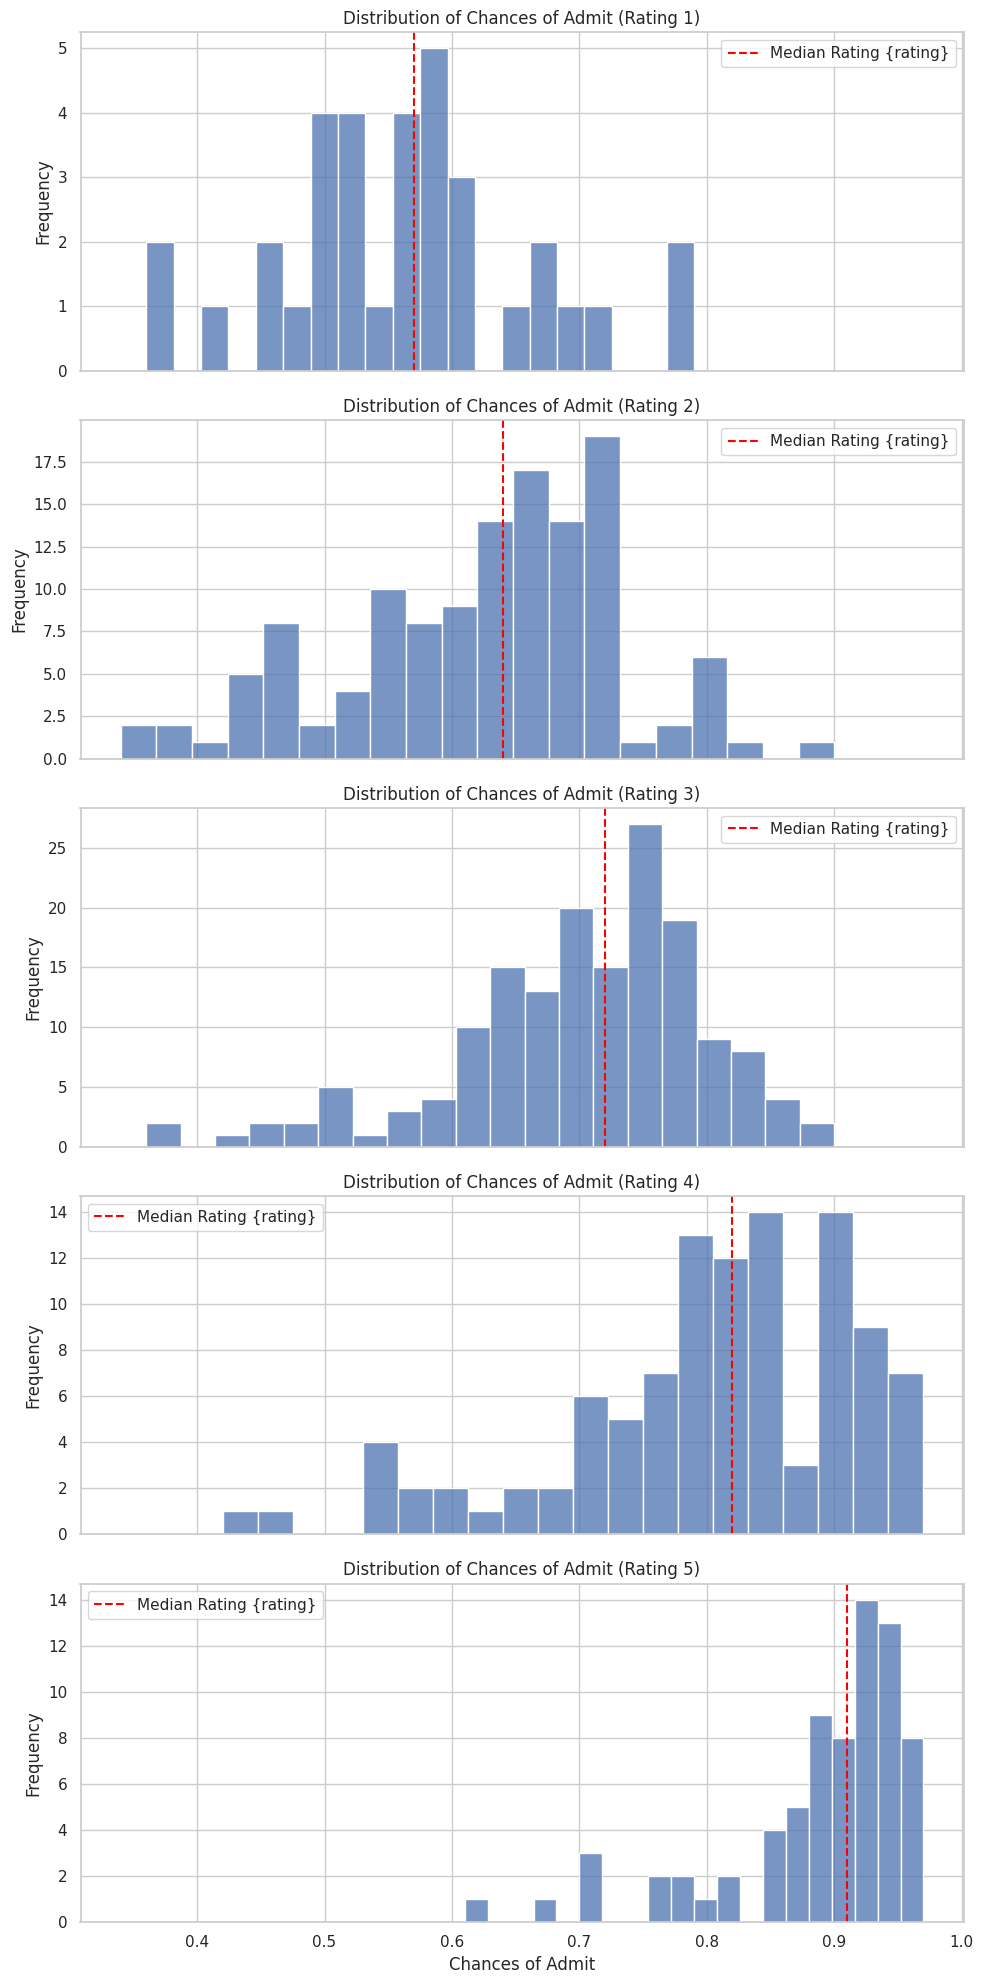

In [ ]:
# we will show this in seaborn, can also be done via multiple calls to plt.hist()

sns.set(style="whitegrid")

# Plot 5 histograms - one for each university rating
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True)
#
for i, rating in enumerate(sorted(df['Rating'].unique())[:5]):
    subset = df[df['Rating'] == rating]['Admit']

    # Plot histogram
    sns.histplot(subset, kde=False, ax=axes[i], bins=20)

    # Add a vertical dashed line at the median
    axes[i].axvline(subset.median(), color='red', linestyle='--', label='Median Rating {rating}')

    # Set labels and title for each subplot
    axes[i].set_xlabel('Chances of Admit')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of Chances of Admit (Rating {rating})')

    # Add legend
    axes[i].legend()

# Show the plots
plt.tight_layout()
plt.show()

**7. Another way to look at the relationship between two variables is through scatter plots. Plot a scatter plot between TOEFL Score and chance of admit.  Make sure to label the axes. How would you describe this relationship?**

Text(0, 0.5, 'Chance of Admission')

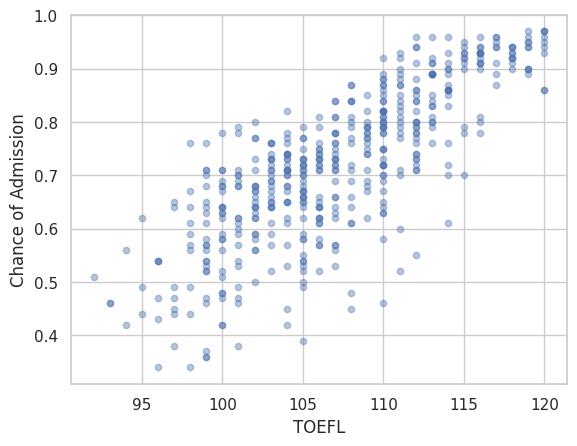

In [ ]:
df.plot.scatter(x = 'TOEFL', y = 'Admit',alpha=0.4) #alpha here helps with overplotting
plt.ylabel("Chance of Admission")

**8. Boxplots are also useful to look at the relationship between a categorical variable and a numeric variable. Plot a boxplot of chance of admit grouped by "University Rating". (check out the *seaborn* library)**

<ipython-input-10-b463bd035a96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x=df["Rating"], y=df["Admit"], palette="Blues");


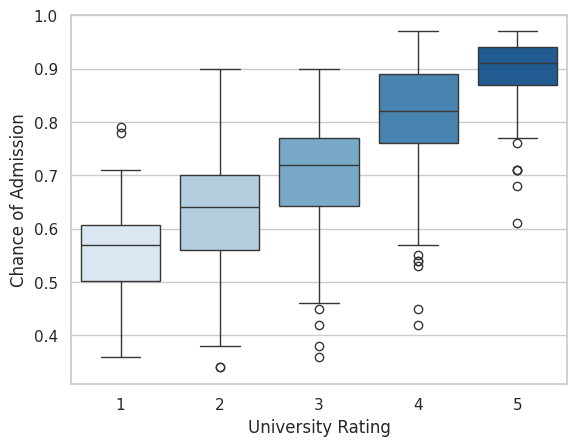

In [ ]:
#YOUR CODE HERE
sns.boxplot( x=df["Rating"], y=df["Admit"], palette="Blues");
plt.xlabel("University Rating")
plt.ylabel("Chance of Admission")
plt.show()

**8b. The boxplots above show some outliers. In particular the box for 'University Rating' = 5 has some cases with lower 'Chance of Admit'.  Can you identify which case (by serial number) has the lowest Chance of Admit but comes from a university with Rating = 5?**


In [ ]:
# Filter cases with 'University Rating' = 5
rating_5_cases = df[df['Rating'] == 5]

# Find the case with the lowest 'Chance of Admit'
lowest_chance_of_admit_case = rating_5_cases[rating_5_cases['Admit'] == rating_5_cases['Admit'].min()]

# Extract the serial number of the identified case
serial_number_of_lowest_chance = lowest_chance_of_admit_case['ID'].values[0]

print(f"The case with the lowest 'Chance of Admit' from a university with Rating = 5 is ID: {serial_number_of_lowest_chance}")

# you can also print out the row with that ID:

df.loc[df['ID']==serial_number_of_lowest_chance]


The case with the lowest 'Chance of Admit' from a university with Rating = 5 is ID: 111


,ID,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
110,111,305,108,5,3.0,3.0,8.48,0,0.61


**9. Drop the column for Serial Number. It is not useful for the following summarization and modelling tasks.**

In [ ]:
df = df.drop(columns=['ID'])

**10. Very often it is useful to quantify how strong is the relationship between different variables. For example, measures of correlation, such as Pearson's correlation coefficient, can show whether one numeric variable gives information on another numeric variable. Pandas allows us to compute the Pearson correlation coefficient between all pairs of columns in our dataframe . Display the correlations between all pairs of columns . Round values to three decimal places.**

In [ ]:
#YOUR CODE HERE
# dont forget to round!!! :)

corr=df.corr(method='pearson').round(3)
corr

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
GRE,1.000,0.827,0.635,0.613,0.525,0.826,0.563,0.810
TOEFL,0.827,1.000,0.650,0.644,0.542,0.811,0.467,0.792
Rating,0.635,0.650,1.000,0.728,0.609,0.705,0.427,0.690
SOP,0.613,0.644,0.728,1.000,0.664,0.712,0.408,0.684
LOR,0.525,0.542,0.609,0.664,1.000,0.637,0.373,0.645
CGPA,0.826,0.811,0.705,0.712,0.637,1.000,0.501,0.882
Research,0.563,0.467,0.427,0.408,0.373,0.501,1.000,0.546
Admit,0.810,0.792,0.690,0.684,0.645,0.882,0.546,1.000


**11. Heatmaps are a tool for conveniently visualizing correlation data. Plot these correlations as a seaborn heatmap. Which pairs of variables are most closely correlated? Which variable gives the most information on chance of admit?** (See our `Module1_Data/Visualization` Module for hints)

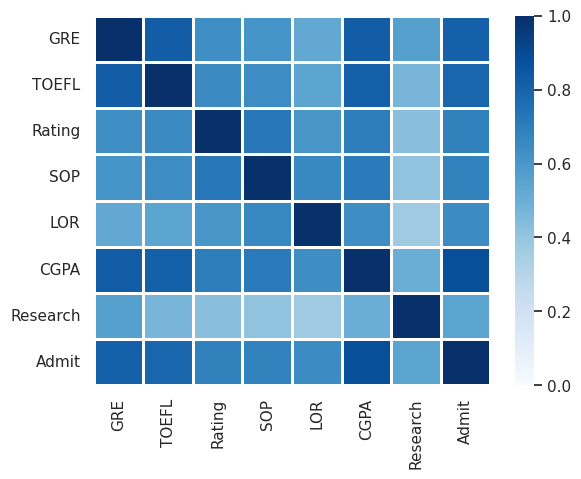

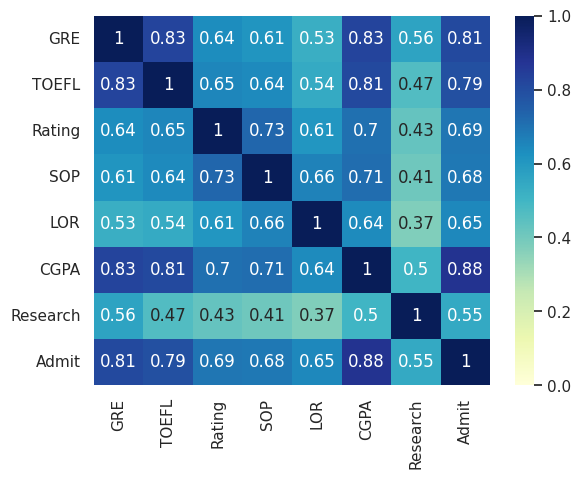

In [ ]:
#YOUR CODE HERE
#Basic way

ax1 = sns.heatmap(corr, cbar=1, linewidths=2,vmax=1, vmin=0, cmap='Blues')
plt.show()

# Nicer version that puts the correlations right in the plot
dataplot = sns.heatmap(corr,vmax=1, vmin=0,cmap="YlGnBu", annot=True)
plt.show()

# Note: if there were negative correlations, we would need to change the color mapping

**12. Build a linear model to predict the chance of admit using the application info available. Generate predictions and compare predicted quantity to the actual value in a scatter plot. Print the $R^2$ value - which measures the effectiveness of the linear model, and the RMSE for your predictions (dont forget to round!)**  We will be covering predictive modeling in upcoming lectures, so having tried it first will give you better context for the material.  You can re-use the code in the section "A Taste of Whats to Come: Predictive Modeling" at the end of the `Managing_Data.ipynb` notebook from `Module1_Data`.

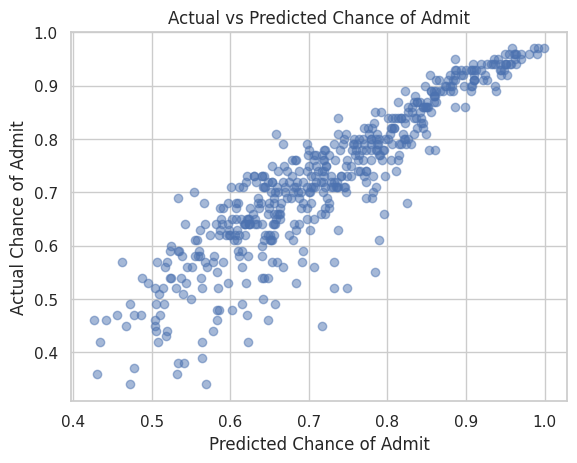

R2 value: 0.822
RMSE =  0.0595


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Features and target variable
X = df[['GRE', 'TOEFL', 'Rating', 'SOP', 'LOR', 'CGPA', 'Research']] #You can also use the .drop() function to drop the Admit column from x
y = df['Admit']

# Build a linear model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
predictions = model.predict(X)

# Plot predicted vs actual values
plt.scatter(predictions,y, alpha=0.5)
plt.xlabel('Predicted Chance of Admit')
plt.ylabel('Actual Chance of Admit')
plt.title('Actual vs Predicted Chance of Admit')
plt.show()

# Print R2 value
r2 = r2_score(y, predictions)
print(f'R2 value: {r2:.3f}')

# Print RMSE value (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y, predictions))
print('RMSE = ', rmse.round(4))



**13. Describe how the admissions team might take action to use the results of this model to aid in the admissions process.  Specifically what actions could they take, and what might the impact be of an effective model.  Do you see any concerns with using this data for this purpose?**

It is hard to know how exacly how best to use this model, since all the information we were given is that the Chance of Admit, which is the target varialbe, was created by "an expert".  We would certainly want to ask more questions about how this target variable was created.

Having said that, there are several ways this could be used by the admisssions team.  One is that it gives insight into what factors have been used traditionally to impact chance of admission.  They can check to see if this aligns with their current goals.

They can also use the model to assess how changes in the predictor attributes might change the overall acceptance rate of the school (for instance, if GPA or TOEFL scores suddenly drop due to a pandemic or other event).

Additionally, the model can help them do a quick identification of the most qualified candidates as part of the admission process.  They may even decide to make the results of the model public, so that applicants can have a better idea a-priori of their acceptance probabilities.

However, there are potential concerns. Since the data is built on previous admissions, any existing biases that have been present in the selection process will be propogated through this new model.  Also, admissions processes are dynamic and multifaceted, so the model should be considered a supplementary tool, not the sole determinant of acceptance. Regular monitoring and updates are necessary to keep the model reflective of the current admissions landscape.


**14.(Optional) We did the previous exercise without using a train/test split of the data.  This is probably the last time we will do this!  We'll get there.  But if you know how to do this, or want to practice in advance, perform the same LinearRegression with an 80/20 train/test split.  Train the regression, and make predictions on the test data.  Measure and report the RMSE.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# As we have already initialized X and y above no need to do it again.
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the linear model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
predictions = model.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse:.3f}')


RMSE: 0.061


**15. (Optional) There are many different types of predictive models, each
with their own plusses and minuses. For this task, repeat your modeling performed in last question, but using a sklearn.ensemble.RandomForestRegressor. How does the scatter plot compare with the prior results?**

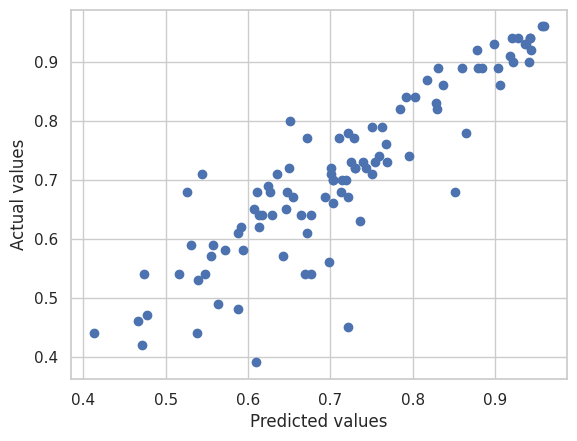

In [ ]:
# Import the required model
from sklearn.ensemble import RandomForestRegressor

# We can use the same training and test set we already used for the last problem (Regression)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr= rfr.predict(X_test)
plt.scatter(y_pred_rfr, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

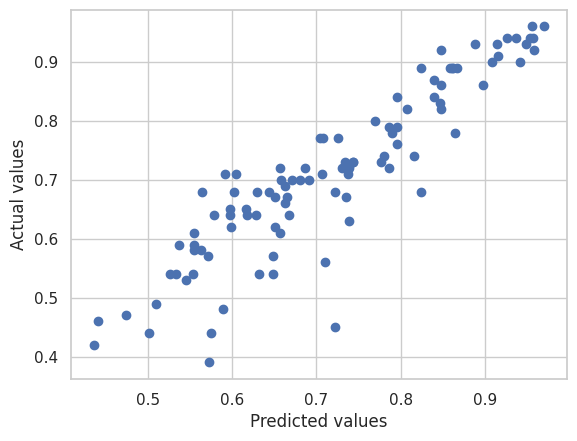

In [ ]:
# plot the same plot, but using the predicted and actual values from the LinearRegression fit
plt.scatter(predictions,y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

In [ ]:
# not asked for in HW, but lets compare the RMSE from the two models:

rmse_reg = np.sqrt(mean_squared_error(y_test, predictions))
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
print("Regression RMSE:",rmse_reg.round(4))
print("Random Forest RMSE:",rmse_rfr.round(4))

Regression RMSE: 0.0609
Random Forest RMSE: 0.0659
